In [1]:
from kneed import DataGenerator, KneeLocator
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os
import scipy.io
import json
import numpy as np
from format_data import *
from utils import *
import pickle

In [2]:
t_pre = 0.5#0.2
t_post = 0.50#0.300
bin_width = 0.005
# Créer les bins de temps"
psth_bins = np.arange(-t_pre, t_post, bin_width)
#gc = np.arange(0, 32)


In [32]:
path = '/auto/data2/eTheremin/ALTAI/ALTAI_20240902_SESSION_00/'

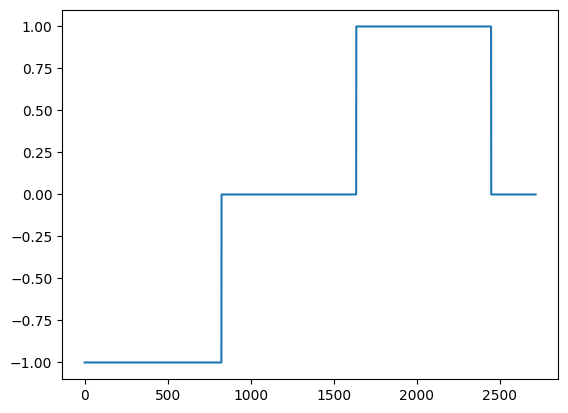

In [33]:
tt_path = path+'headstage_0/tt.pkl'
with open(tt_path, 'rb') as file:
    tt = pickle.load(file)
plt.plot(tt['condition'])

In [34]:
print(len(tt['tones']))
print(len(tt['triggers']))

2718
2718


In [6]:
data = np.load(path+f'headstage_0/data_{bin_width}.npy', allow_pickle=True)
features = np.load(path+f'headstage_0/features_{bin_width}.npy', allow_pickle=True)
gc = np.load(path+'headstage_0/good_clusters.npy', allow_pickle=True)

In [7]:
gc

array([30, 29, 20, 31, 17, 27, 21,  6, 28,  8, 23, 14,  5,  1,  7, 24, 26])

In [25]:
warmup = get_psth_in_block(data, features, t_pre, t_post, bin_width, gc, 0, 'tail')
tracking_1  = get_psth_in_block(data, features, t_pre, t_post, bin_width, gc, 1, 'tracking')
mc_1 = get_psth_in_block(data, features, t_pre, t_post, bin_width, gc, 1, 'mapping change')
tracking_2 = get_psth_in_block(data, features, t_pre, t_post, bin_width, gc, 2, 'tracking')
mc_2 = get_psth_in_block(data, features, t_pre, t_post, bin_width, gc, 2, 'mapping change')
warmdown = get_psth_in_block(data, features, t_pre, t_post, bin_width, gc, 3, 'tail')

In [26]:
tab = warmup

In [28]:
warmdown

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]

In [29]:
features

array([{'Played_frequency': 0.0, 'Condition': -1.0, 'Block': 0.0, 'Frequency_changes': False},
       {'Played_frequency': 0.0, 'Condition': -1.0, 'Block': 0.0, 'Frequency_changes': False},
       {'Played_frequency': 0.0, 'Condition': -1.0, 'Block': 0.0, 'Frequency_changes': False},
       ...,
       {'Played_frequency': 2317.0, 'Condition': 2.0, 'Block': 2.0, 'Frequency_changes': False},
       {'Played_frequency': 2317.0, 'Condition': 2.0, 'Block': 2.0, 'Frequency_changes': False},
       {'Played_frequency': 2317.0, 'Condition': 2.0, 'Block': 2.0, 'Frequency_changes': False}],
      dtype=object)

In [15]:
n = int(len(tab[0])/4)
tracking = np.array(tab)
first_tr = tracking[:,:n]
second_tr = tracking[:,n:2*n]
third_tr = tracking[:,2*n:3*n]
fourth_tr = tracking[:,3*n:]

In [17]:
# la moyenne sur tous les clusters
c_tracking = np.nanmean(first_tr, axis=0)
cc_tracking = np.nanmean(second_tr, axis=0)
ccc_tracking = np.nanmean(third_tr, axis=0)
cccc_tracking = np.nanmean(fourth_tr, axis=0)

m_tracking = np.nanmean(c_tracking, axis=0)
mm_tracking = np.nanmean(cc_tracking, axis=0)
mmm_tracking = np.nanmean(ccc_tracking, axis=0)
mmmm_tracking = np.nanmean(cccc_tracking, axis=0)

sem_tr = get_sem(c_tracking)
sem_pb = get_sem(cc_tracking)
sem_ccc = get_sem(ccc_tracking)
sem_cccc = get_sem(cccc_tracking)


plt.plot(psth_bins, m_tracking, c = 'yellow', label = 'first quarter tracking_1 ')
plt.plot(psth_bins, mm_tracking, c = 'orange',  label = 'second quarter tracking_1')
plt.plot(psth_bins, mmm_tracking, c = 'red',  label = 'third quarter tracking_1')
plt.plot(psth_bins, mmmm_tracking, c = 'purple',  label = 'fourth quarter tracking_1')

plt.fill_between(psth_bins, m_tracking - sem_tr, m_tracking + sem_tr, color='yellow', alpha=0.2)
plt.fill_between(psth_bins, mm_tracking - sem_pb, mm_tracking + sem_pb, color='orange', alpha=0.2)
plt.fill_between(psth_bins, mmm_tracking - sem_ccc, mmm_tracking + sem_ccc, color='red', alpha=0.2)
plt.fill_between(psth_bins, mmmm_tracking - sem_cccc, mmmm_tracking + sem_cccc, color='purple', alpha=0.2)
plt.title('Evolution of tracking_1(Average over all clusters)')
plt.xlabel('Time [s]')
plt.ylabel('[spikes/s]')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()

/tmp/ipykernel_753883/998306580.py:7: RuntimeWarning: Mean of empty slice
  m_tracking = np.nanmean(c_tracking, axis=0)
/tmp/ipykernel_753883/998306580.py:8: RuntimeWarning: Mean of empty slice
  mm_tracking = np.nanmean(cc_tracking, axis=0)
/tmp/ipykernel_753883/998306580.py:9: RuntimeWarning: Mean of empty slice
  mmm_tracking = np.nanmean(ccc_tracking, axis=0)
/tmp/ipykernel_753883/998306580.py:10: RuntimeWarning: Mean of empty slice
  mmmm_tracking = np.nanmean(cccc_tracking, axis=0)


IndexError: index 0 is out of bounds for axis 0 with size 0

/tmp/ipykernel_753883/2523759078.py:17: RuntimeWarning: Mean of empty slice
  axes[row, col].plot(psth_bins, np.nanmean(tracking_0[cluster], axis=0), c = 'orange')


ValueError: x and y must have same first dimension, but have shapes (200,) and (1,)

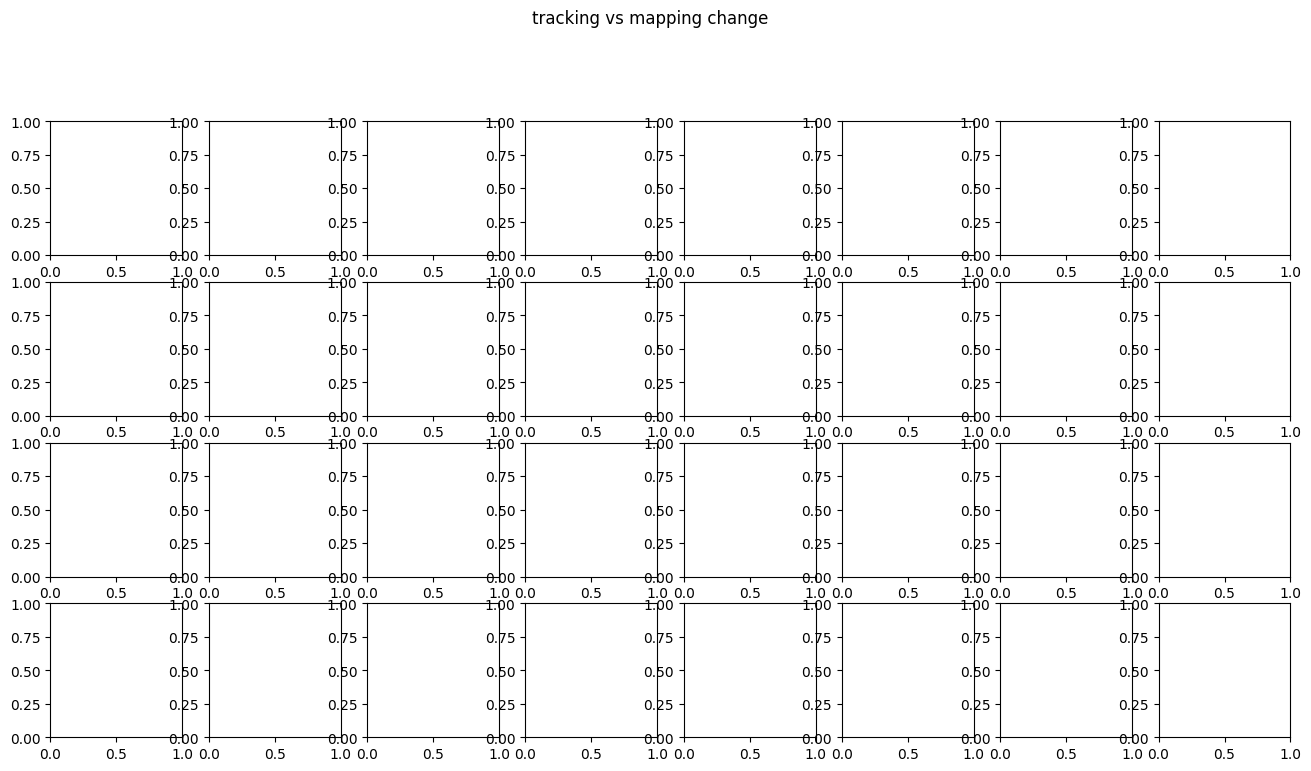

In [11]:
#tail = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tail')
#tracking = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tracking')
#mc = get_psth(data, features, t_pre, t_post, bin_width, gc, 'mapping change')
#np.save(path+'headstage_0/psth_tracking_0.005.npy', tracking)
#np.save(path+'headstage_0/psth_mappingchange_0.005.npy', mc) 
#np.save(path+'headstage_0/psth_tail_0.005.npy', tail)

    # pour plot cluster par cluster16
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('tracking vs mapping change', y=1.02)
plt.subplots_adjust() 
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)
psth_bins = np.arange(-t_pre, t_post, bin_width)
for cluster in range(num_plots):
    if cluster < num_plots: 
        row, col = get_plot_coords(cluster)
        axes[row, col].plot(psth_bins, np.nanmean(tracking_0[cluster], axis=0), c = 'orange')
        axes[row, col].plot(psth_bins, np.nanmean(tracking_1[cluster], axis=0), c = 'red')
        axes[row, col].plot(psth_bins, np.nanmean(mc[cluster], axis=0), c = 'purple')
        axes[row, col].axvline(0, c = 'grey', linestyle='--')
        axes[row, col].set_title(f'Cluster {cluster}')
        axes[row, col].spines['top'].set_visible(False)
        axes[row, col].spines['right'].set_visible(False)
#plt.savefig(path+'headstage_0/psth_cluster.png')


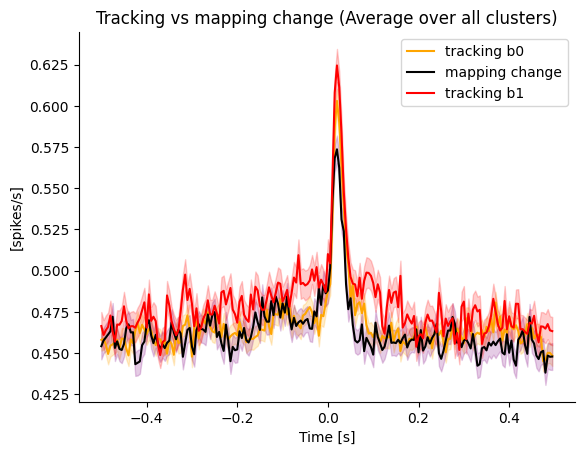

In [17]:
    # la moyenne sur tous les clusters
c_tracking = np.nanmean(tracking_0, axis=0)
c_playback = np.nanmean(mc, axis=0)
cc_tracking = np.nanmean(tracking_1, axis=0)

m_tracking = np.nanmean(c_tracking, axis=0)
m_playback = np.nanmean(c_playback, axis=0)
mm_tracking = np.nanmean(cc_tracking, axis=0)

sem_tr = get_sem(c_tracking)
sem_pb = get_sem(c_playback)
sem_ttr = get_sem(cc_tracking)

plt.plot(psth_bins, m_tracking, c = 'orange', label = 'tracking b0')
plt.plot(psth_bins, m_playback, c = 'black',  label = 'mapping change')
plt.plot(psth_bins, mm_tracking, c = 'red', label = 'tracking b1')
plt.fill_between(psth_bins, m_tracking - sem_tr, m_tracking + sem_tr, color='orange', alpha=0.2)
plt.fill_between(psth_bins, m_playback - sem_pb, m_playback + sem_pb, color='purple', alpha=0.2)
plt.fill_between(psth_bins, mm_tracking - sem_ttr, mm_tracking + sem_ttr, color='red', alpha=0.2)
plt.title('Tracking vs mapping change (Average over all clusters)')
plt.xlabel('Time [s]')
plt.ylabel('[spikes/s]')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()

#plt.savefig(path+'headstage_0/psth_average.png')